In [1]:
import pandas as pd

In [2]:
# pip install patool

In [3]:
# import patoolib
# patoolib.extract_archive("/content/vostok_tube.zip.001", outdir="/content/data")

In [4]:
data = pd.read_csv('/content/data/vostok_tube.csv',sep = ';')

In [5]:
data

,BHP,THP,WCT,LIQ,GOR,D,L,R,dH
0,"3,7523","3,7523","0,0","1,829","26,50459267359213","0,257",500,"0,00015","0,0"
1,"3,75231","3,7523","0,0","5,069","26,5046360228842","0,257",500,"0,00015","0,0"
2,"3,75231","3,7523","0,0","10,191","26,50456284957315","0,257",500,"0,00015","0,0"
3,"3,75232","3,7523","0,0","19,577","26,50462277161976","0,257",500,"0,00015","0,0"
4,"3,75233","3,7523","0,0","24,764","26,504603456630594","0,257",500,"0,00015","0,0"
...,...,...,...,...,...,...,...,...,...
2167275,"12,2047","11,2736","0,0","168,415","2781,806846183535","0,203",700,"0,00015","0,0"
2167276,"12,2457","11,2736","0,0","171,862","2781,8074967124785","0,203",700,"0,00015","0,0"
2167277,"12,317","11,2736","0,0","177,697","2781,802731616178","0,203",700,"0,00015","0,0"
2167278,"12,3192","11,2736","0,0","177,87","2781,806937651093","0,203",700,"0,00015","0,0"


In [6]:
data_modified = data.copy()

In [7]:
for col in data_modified.columns:
  if col == 'L':
    continue
  data_modified[col] = data_modified[col].map(lambda x: float(x.replace(',','.')))

In [8]:
data_modified[data_modified['D'] == 0.14300000000000002] = 0.143

In [9]:
# data_modified['D' == 0.14300000000000002] = 0.143

In [10]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167280 entries, 0 to 2167279
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   BHP     float64
 1   THP     float64
 2   WCT     float64
 3   LIQ     float64
 4   GOR     float64
 5   D       float64
 6   L       float64
 7   R       float64
 8   dH      float64
dtypes: float64(9)
memory usage: 148.8 MB


In [11]:
print(len(data_modified))
print(len(data_modified.dropna()))

2167280
2167280


In [12]:
#BHP -> THP (THP should be lower)
# предсказываем BHP

In [13]:
data_modified = data_modified[data_modified.BHP>data_modified.THP]
data_modified

,BHP,THP,WCT,LIQ,GOR,D,L,R,dH
1,3.75231,3.7523,0.0,5.069,26.504636,0.257,500.0,0.00015,0.0
2,3.75231,3.7523,0.0,10.191,26.504563,0.257,500.0,0.00015,0.0
3,3.75232,3.7523,0.0,19.577,26.504623,0.257,500.0,0.00015,0.0
4,3.75233,3.7523,0.0,24.764,26.504603,0.257,500.0,0.00015,0.0
5,3.75233,3.7523,0.0,26.768,26.504595,0.257,500.0,0.00015,0.0
...,...,...,...,...,...,...,...,...,...
2167275,12.20470,11.2736,0.0,168.415,2781.806846,0.203,700.0,0.00015,0.0
2167276,12.24570,11.2736,0.0,171.862,2781.807497,0.203,700.0,0.00015,0.0
2167277,12.31700,11.2736,0.0,177.697,2781.802732,0.203,700.0,0.00015,0.0
2167278,12.31920,11.2736,0.0,177.870,2781.806938,0.203,700.0,0.00015,0.0


In [14]:
print(data_modified.dH.value_counts()) #dH не меняется
print(data_modified.R.value_counts())
print(data_modified.L.value_counts())
print(data_modified.D.value_counts())

dH
0.0    1844819
Name: count, dtype: int64
R
0.00015    1694819
0.00100     150000
Name: count, dtype: int64
L
500.0     338957
700.0     312103
450.0     297927
5500.0    297927
2700.0    297905
2100.0    150000
8500.0    150000
Name: count, dtype: int64
D
0.098    595832
0.257    338957
0.203    312103
0.143    300000
0.073    297927
Name: count, dtype: int64


In [15]:
data_modified.drop_duplicates(inplace=True)

In [16]:
data_grouped = data_modified.groupby(['R','D','L'])

In [17]:
data_grouped.groups.keys()

dict_keys([(0.00015, 0.073, 5500.0), (0.00015, 0.098, 450.0), (0.00015, 0.098, 2700.0), (0.00015, 0.143, 2100.0), (0.00015, 0.203, 700.0), (0.00015, 0.257, 500.0), (0.001, 0.143, 8500.0)])

In [18]:
print(len(data_grouped.get_group((0.001, 0.143, 8500))))
print(len(data_grouped.get_group((0.00015, 0.073, 5500))))

144000
193312


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [21]:
def create_model(numOfLayers,numOfNeurons,activationFunc, inputShape):
  model_ = Sequential()
  model_.add(Dense(units = numOfNeurons,input_dim = inputShape,activation = activationFunc))
  for i in range(numOfLayers-1):
    model_.add(Dense(units = numOfNeurons,activation = activationFunc))
  model_.add(Dense(units=1,activation = 'linear'))
  return model_

In [22]:
def printRes(mse,mae,r2):
  print(f'MSE: {mse}')
  print(f'MAE: {mae}')
  print(f'R2: {r2}')
  print('--------')

In [29]:
from sklearn.preprocessing import StandardScaler
def standartiseData(data,scaler_fit = None):
  scaler = StandardScaler()
  if scaler_fit == None:
    scaler_fit = scaler.fit(data)
  scaled_data = scaler_fit.transform(data)
  return scaled_data,scaler_fit

In [30]:
from sklearn.preprocessing import Normalizer
def normaliseData(data,normaliser_fit = None):
  normer = Normalizer()
  if normaliser_fit == None:
    normaliser_fit = normer.fit(data)
  scaled_data = normaliser_fit.transform(data)
  return scaled_data,normaliser_fit

In [24]:
import matplotlib.pyplot as plt

In [25]:
def printResultsPlot(preds,reals):
  plt.scatter(preds, reals)
  plt.show()

Epoch 1/10
11657/11657 [==============================] - 39s 3ms/step - loss: 32.8841 - mean_absolute_percentage_error: 32.8841 - val_loss: 25.8033 - val_mean_absolute_percentage_error: 25.8033
Epoch 2/10
11657/11657 [==============================] - 37s 3ms/step - loss: 24.4576 - mean_absolute_percentage_error: 24.4576 - val_loss: 23.4574 - val_mean_absolute_percentage_error: 23.4574
Epoch 3/10
11657/11657 [==============================] - 36s 3ms/step - loss: 22.1351 - mean_absolute_percentage_error: 22.1351 - val_loss: 19.3407 - val_mean_absolute_percentage_error: 19.3407
Epoch 4/10
11657/11657 [==============================] - 39s 3ms/step - loss: 21.0922 - mean_absolute_percentage_error: 21.0922 - val_loss: 19.7982 - val_mean_absolute_percentage_error: 19.7982
Epoch 5/10
11657/11657 [==============================] - 36s 3ms/step - loss: 20.8762 - mean_absolute_percentage_error: 20.8762 - val_loss: 19.9542 - val_mean_absolute_percentage_error: 19.9542
Epoch 6/10
11657/11657 [=

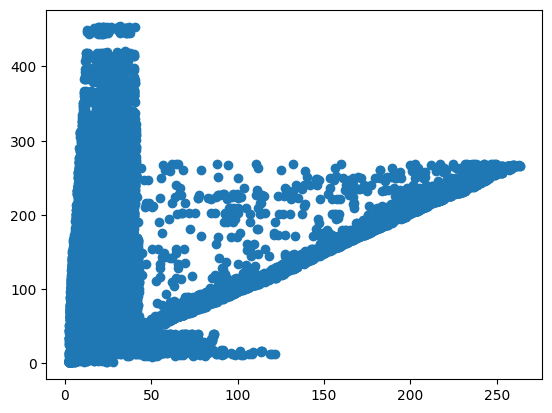

Epoch 1/10
11537/11537 [==============================] - 38s 3ms/step - loss: 9.5634 - mean_absolute_percentage_error: 9.5634 - val_loss: 8.5020 - val_mean_absolute_percentage_error: 8.5020
Epoch 2/10
11537/11537 [==============================] - 37s 3ms/step - loss: 7.4654 - mean_absolute_percentage_error: 7.4654 - val_loss: 8.2641 - val_mean_absolute_percentage_error: 8.2641
Epoch 3/10
11537/11537 [==============================] - 35s 3ms/step - loss: 7.0634 - mean_absolute_percentage_error: 7.0634 - val_loss: 7.3082 - val_mean_absolute_percentage_error: 7.3082
Epoch 4/10
11537/11537 [==============================] - 35s 3ms/step - loss: 6.8815 - mean_absolute_percentage_error: 6.8815 - val_loss: 6.5851 - val_mean_absolute_percentage_error: 6.5851
Epoch 5/10
11537/11537 [==============================] - 36s 3ms/step - loss: 6.5685 - mean_absolute_percentage_error: 6.5685 - val_loss: 6.9054 - val_mean_absolute_percentage_error: 6.9054
Epoch 6/10
11537/11537 [=====================

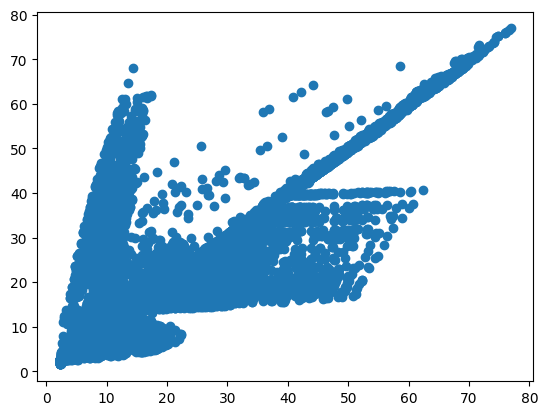

Epoch 1/10
11716/11716 [==============================] - 39s 3ms/step - loss: 14.6184 - mean_absolute_percentage_error: 14.6184 - val_loss: 11.8352 - val_mean_absolute_percentage_error: 11.8352
Epoch 2/10
11716/11716 [==============================] - 39s 3ms/step - loss: 10.8396 - mean_absolute_percentage_error: 10.8396 - val_loss: 9.9623 - val_mean_absolute_percentage_error: 9.9623
Epoch 3/10
11716/11716 [==============================] - 37s 3ms/step - loss: 9.7712 - mean_absolute_percentage_error: 9.7712 - val_loss: 9.8780 - val_mean_absolute_percentage_error: 9.8780
Epoch 4/10
11716/11716 [==============================] - 38s 3ms/step - loss: 9.1972 - mean_absolute_percentage_error: 9.1972 - val_loss: 10.3913 - val_mean_absolute_percentage_error: 10.3913
Epoch 5/10
11716/11716 [==============================] - 39s 3ms/step - loss: 8.9128 - mean_absolute_percentage_error: 8.9128 - val_loss: 10.6027 - val_mean_absolute_percentage_error: 10.6027
Epoch 6/10
11716/11716 [===========

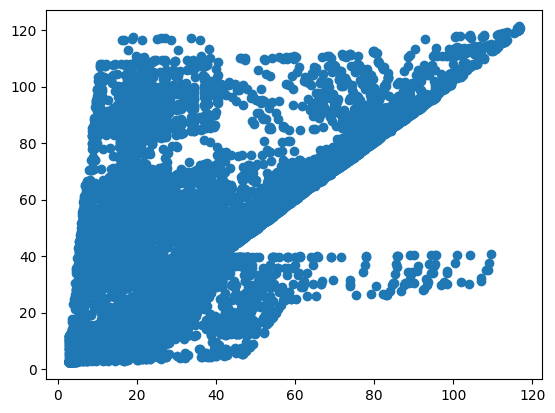

Epoch 1/10
8539/8539 [==============================] - 29s 3ms/step - loss: 2.7042 - mean_absolute_percentage_error: 2.7042 - val_loss: 1.6680 - val_mean_absolute_percentage_error: 1.6680
Epoch 2/10
8539/8539 [==============================] - 27s 3ms/step - loss: 1.4629 - mean_absolute_percentage_error: 1.4629 - val_loss: 1.0725 - val_mean_absolute_percentage_error: 1.0725
Epoch 3/10
8539/8539 [==============================] - 27s 3ms/step - loss: 1.2430 - mean_absolute_percentage_error: 1.2430 - val_loss: 0.6703 - val_mean_absolute_percentage_error: 0.6703
Epoch 4/10
6000/8539 [====================>.........] - ETA: 8s - loss: 1.1196 - mean_absolute_percentage_error: 1.1196

KeyboardInterrupt: 

In [45]:
for group in data_grouped.groups.keys():
  temp_dat = data_grouped.get_group(group).drop(['D','L','R','dH'],axis=1)
  X_train, X_test, y_train, y_test = train_test_split(temp_dat.drop(['BHP'],axis=1), temp_dat.BHP, test_size=0.33, random_state=42)
  X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
  X_train, scaler_ = standartiseData(X_train)
  X_test, _ = standartiseData(X_test,scaler_)
  X_valid, _ = standartiseData(X_valid,scaler_)
  model = create_model(numOfLayers=10,numOfNeurons=50,activationFunc='relu',inputShape = X_train.shape[1])
  model.compile(optimizer='adam',loss='mean_absolute_percentage_error',metrics=['mean_absolute_percentage_error'])
  history = model.fit(X_train,y_train,epochs=10,batch_size=10,validation_data=(X_valid,y_valid))
  preds = model.predict(X_test).astype(float)
  print(preds)

  mse = mean_squared_error(y_test,preds)
  mae = mean_absolute_error(y_test,preds)
  r2 = r2_score(y_test,preds)
  printRes(mse,mae,r2)
  printResultsPlot(preds,y_test)

  model.save(f'Pipe_with_params_{group}_model')


In [34]:
def printHistoryPlot(hsitory):
  plt.plot(history.history['mean_absolute_percentage_error'])
  plt.plot(history.history['val_mean_absolute_percentage_error'])
  plt.ylabel('mean_absolute_percentage_error')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [36]:
group = (0.00015, 0.098, 450.0)
temp_dat = data_grouped.get_group(group).drop(['D','L','R','dH'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(temp_dat.drop(['BHP'],axis=1), temp_dat.BHP, test_size=0.33, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train, scaler_ = standartiseData(X_train)
X_test, _ = standartiseData(X_test,scaler_)
X_valid, _ = standartiseData(X_valid,scaler_)
model = create_model(numOfLayers=10,numOfNeurons=50,activationFunc='relu',inputShape = X_train.shape[1])
model.compile(optimizer='adam',loss='mean_absolute_percentage_error',metrics=['mean_absolute_percentage_error'])
history = model.fit(X_train,y_train,epochs=10,batch_size=10,validation_data=(X_valid,y_valid))

Epoch 1/10
11537/11537 [==============================] - 43s 3ms/step - loss: 9.5367 - mean_absolute_percentage_error: 9.5367 - val_loss: 8.9070 - val_mean_absolute_percentage_error: 8.9070
Epoch 2/10
11537/11537 [==============================] - 34s 3ms/step - loss: 7.3974 - mean_absolute_percentage_error: 7.3974 - val_loss: 7.0544 - val_mean_absolute_percentage_error: 7.0544
Epoch 3/10
11537/11537 [==============================] - 40s 3ms/step - loss: 7.0041 - mean_absolute_percentage_error: 7.0041 - val_loss: 7.8943 - val_mean_absolute_percentage_error: 7.8943
Epoch 4/10
11537/11537 [==============================] - 36s 3ms/step - loss: 6.7725 - mean_absolute_percentage_error: 6.7725 - val_loss: 7.2953 - val_mean_absolute_percentage_error: 7.2953
Epoch 5/10
11537/11537 [==============================] - 36s 3ms/step - loss: 6.5137 - mean_absolute_percentage_error: 6.5137 - val_loss: 6.5665 - val_mean_absolute_percentage_error: 6.5665
Epoch 6/10
11537/11537 [=====================

1973/1973 [==============================] - 3s 2ms/step
[[15.16405869]
 [40.21796799]
 [34.71121979]
 ...
 [11.89083958]
 [44.17621231]
 [31.36427689]]
MSE: 17.949410309852503
MAE: 1.1144682658361906
R2: 0.8680968384631086
--------


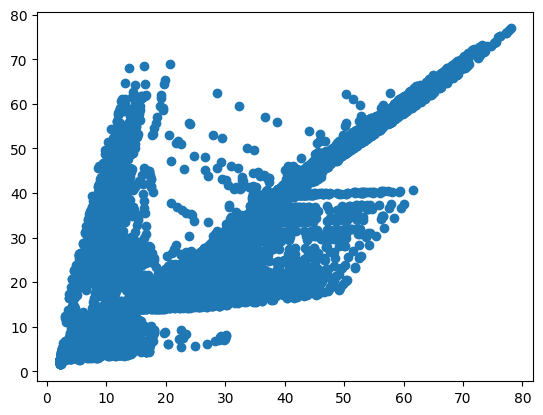

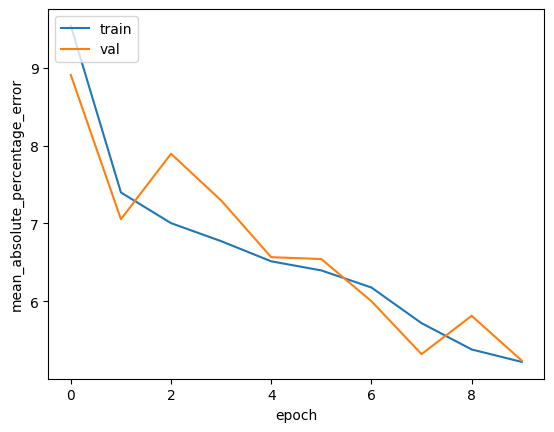

In [37]:
preds = model.predict(X_test).astype(float)
print(preds)

mse = mean_squared_error(y_test,preds)
mae = mean_absolute_error(y_test,preds)
r2 = r2_score(y_test,preds)

printRes(mse,mae,r2)
printResultsPlot(preds,y_test)
printHistoryPlot(history)

In [41]:
print(len(data_grouped.get_group((0.00015, 0.098, 450.0))))
print(len(data_grouped.get_group((0.00015, 0.073, 5500.0))))

191312
193312


In [42]:
data_grouped.get_group((0.00015, 0.098, 450.0))

,BHP,THP,WCT,LIQ,GOR,D,L,R,dH
450000,1.52088,1.51912,0.0,4.930,206.738337,0.098,450.0,0.00015,0.0
450001,1.52133,1.51912,0.0,5.688,206.736990,0.098,450.0,0.00015,0.0
450002,1.53767,1.51912,0.0,17.688,206.737336,0.098,450.0,0.00015,0.0
450003,1.54192,1.51912,0.0,19.538,206.737128,0.098,450.0,0.00015,0.0
450004,1.55541,1.51912,0.0,24.481,206.737470,0.098,450.0,0.00015,0.0
...,...,...,...,...,...,...,...,...,...
1549995,42.19440,39.72280,0.0,168.415,9822.759255,0.098,450.0,0.00015,0.0
1549996,42.30010,39.72280,0.0,171.862,9822.706590,0.098,450.0,0.00015,0.0
1549997,42.48380,39.72280,0.0,177.697,9822.731954,0.098,450.0,0.00015,0.0
1549998,42.48930,39.72280,0.0,177.870,9822.735706,0.098,450.0,0.00015,0.0


In [43]:
data_grouped.get_group((0.00015, 0.073, 5500.0))

,BHP,THP,WCT,LIQ,GOR,D,L,R,dH
900000,1.86393,1.24885,0.0,6.025,514.821577,0.073,5500.0,0.00015,0.0
900001,2.52136,1.24885,0.0,9.366,514.821695,0.073,5500.0,0.00015,0.0
900002,2.83008,1.24885,0.0,10.812,514.821495,0.073,5500.0,0.00015,0.0
900003,4.96101,1.24885,0.0,20.285,514.823761,0.073,5500.0,0.00015,0.0
900004,5.06638,1.24885,0.0,20.744,514.823563,0.073,5500.0,0.00015,0.0
...,...,...,...,...,...,...,...,...,...
1999995,42.19440,39.72280,0.0,168.415,9822.759255,0.073,5500.0,0.00015,0.0
1999996,42.30010,39.72280,0.0,171.862,9822.706590,0.073,5500.0,0.00015,0.0
1999997,42.48380,39.72280,0.0,177.697,9822.731954,0.073,5500.0,0.00015,0.0
1999998,42.48930,39.72280,0.0,177.870,9822.735706,0.073,5500.0,0.00015,0.0


In [38]:
group =  (0.00015, 0.073, 5500.0)
temp_dat = data_grouped.get_group(group).drop(['D','L','R','dH'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(temp_dat.drop(['BHP'],axis=1), temp_dat.BHP, test_size=0.33, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train, scaler_ = standartiseData(X_train)
X_test, _ = standartiseData(X_test,scaler_)
X_valid, _ = standartiseData(X_valid,scaler_)
model = create_model(numOfLayers=10,numOfNeurons=50,activationFunc='relu',inputShape = X_train.shape[1])
model.compile(optimizer='adam',loss='mean_absolute_percentage_error',metrics=['mean_absolute_percentage_error'])
history = model.fit(X_train,y_train,epochs=10,batch_size=10,validation_data=(X_valid,y_valid))

Epoch 1/10
 2823/11657 [======>.......................] - ETA: 27s - loss: 39.5571 - mean_absolute_percentage_error: 39.5571

KeyboardInterrupt: 

In [ ]:
preds = model.predict(X_test).astype(float)
print(preds)

mse = mean_squared_error(y_test,preds)
mae = mean_absolute_error(y_test,preds)
r2 = r2_score(y_test,preds)

printRes(mse,mae,r2)
printResultsPlot(preds,y_test)
printHistoryPlot(history)